# Práctica 5 – Correlación y Modelo Lineal (Anime Dataset)

En esta práctica realizaremos:

- Matriz de correlación entre variables numéricas.
- Heatmap para visualizar relaciones.
- Creación de un modelo lineal (regresión) para predecir **Rating**.
- Obtención del R².
- Gráfica del modelo de regresión.
- Interpretación de resultados.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv("../data/Anime_clean.csv")

pd.set_option("display.max_columns", None)
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [2]:
numeric_cols = ["Rank", "Episodes", "Rating", "Release_year", "End_year"]

df_numeric = df[numeric_cols]
df_numeric.head()


,Rank,Episodes,Rating,Release_year,End_year
0,1.0,24.0,4.60,2021.0,NaN
1,2.0,13.0,4.60,2021.0,NaN
2,3.0,12.0,4.58,2021.0,NaN
3,4.0,64.0,4.58,2009.0,2010.0
4,5.0,10.0,4.57,2019.0,NaN


In [3]:
corr = df_numeric.corr()
corr


,Rank,Episodes,Rating,Release_year,End_year
Rank,1.000000,-0.108638,-0.954267,-0.156562,-0.124461
Episodes,-0.108638,1.000000,0.104494,-0.226818,-0.158751
Rating,-0.954267,0.104494,1.000000,0.171367,0.134411
Release_year,-0.156562,-0.226818,0.171367,1.000000,0.994762
End_year,-0.124461,-0.158751,0.134411,0.994762,1.000000


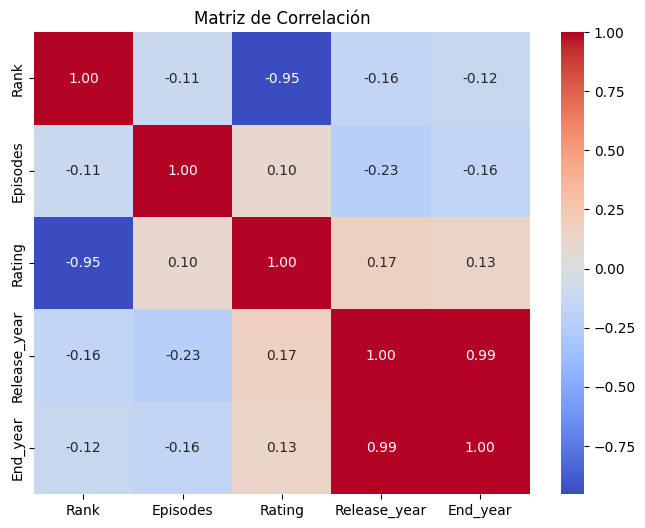

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:

X = df[["Episodes", "Release_year", "Rank"]]
y = df["Rating"]


data = pd.concat([X, y], axis=1)
data = data.dropna(subset=["Episodes", "Release_year", "Rank", "Rating"])


X = data[["Episodes", "Release_year", "Rank"]]
y = data["Rating"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape



((6785, 3), (1697, 3))

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [9]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
intercept = model.intercept_

coef_df, intercept


(       Variable  Coeficiente
 0      Episodes     0.000037
 1  Release_year     0.000312
 2          Rank    -0.000088,
 np.float64(3.400429498333487))

In [10]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2


0.9018753221667324

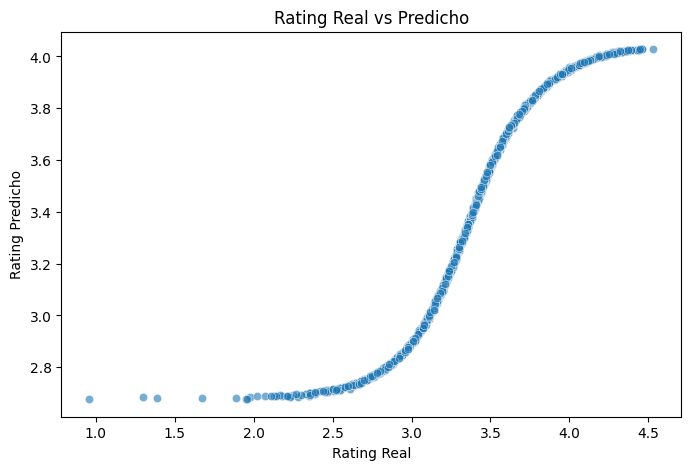

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Rating Real")
plt.ylabel("Rating Predicho")
plt.title("Rating Real vs Predicho")
plt.show()


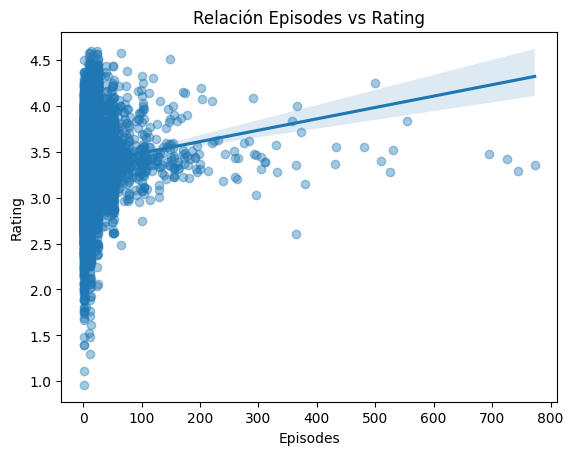

In [12]:
sns.regplot(x="Episodes", y="Rating", data=df, scatter_kws={"alpha":0.4})
plt.title("Relación Episodes vs Rating")
plt.show()
